### Imports

---

In [9]:
import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

In [10]:
from functions.data_filtering import process_data
from functions.data_extraction import extract_date_from_file_path, analyze_seismic_data

### Parameters

---

In [11]:
# Define the specific time of interest
time = "04:30:00"

# This determines the time range around the specific time for data trimming
window_size = 600 

# Specify the station code
station = 'R716E'

### Read Files

---

In [12]:
# Read file paths from file_paths.txt
with open("filepaths.txt", "r") as file:
    file_paths = [line.strip() for line in file if not line.startswith("#")]

### Plot Stream Data

The goal of this method is to have a quick insight on what the data looks like. 

We can easily see by the plot and by ratio that some data are much noisier than others. 

---

Signal-to-Noise Ratio (SNR) for 2024-04-01: 13.56


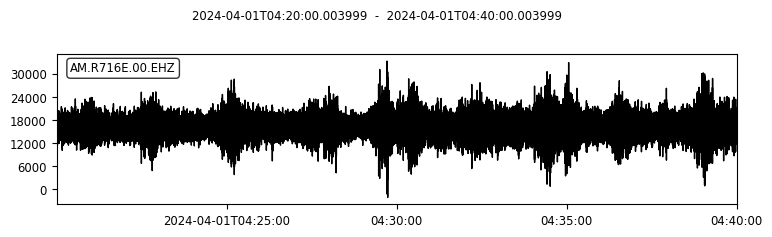

Signal-to-Noise Ratio (SNR) for 2024-04-02: 12.40


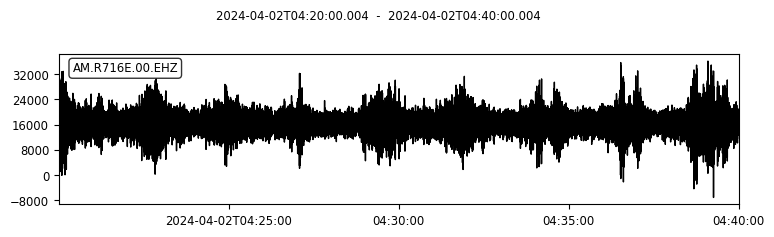

Signal-to-Noise Ratio (SNR) for 2024-04-03: 14.76


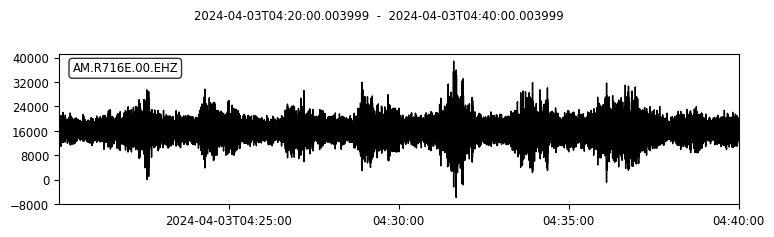

Signal-to-Noise Ratio (SNR) for 2024-04-04: 15.38


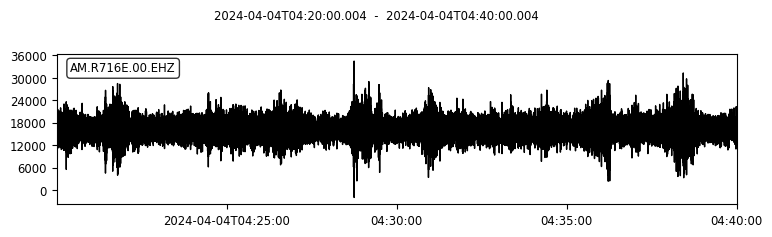

Signal-to-Noise Ratio (SNR) for 2024-04-05: 12.88


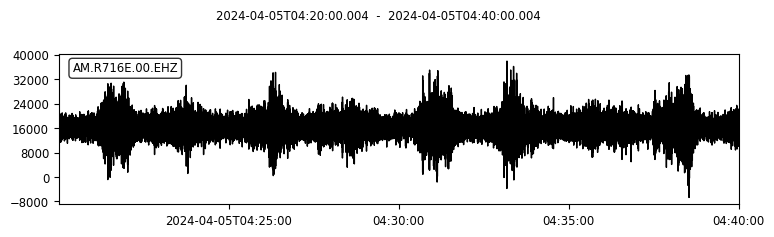

Signal-to-Noise Ratio (SNR) for 2024-04-06: 22.44


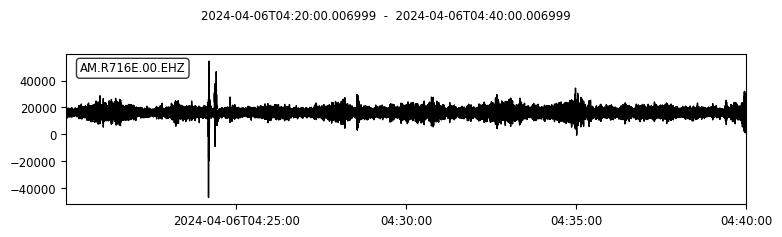

Signal-to-Noise Ratio (SNR) for 2024-04-09: 16.76


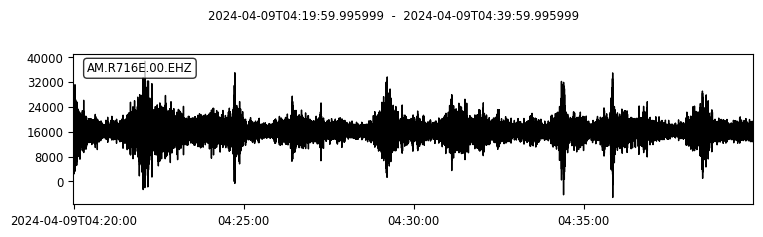

Signal-to-Noise Ratio (SNR) for 2024-04-10: 22.88


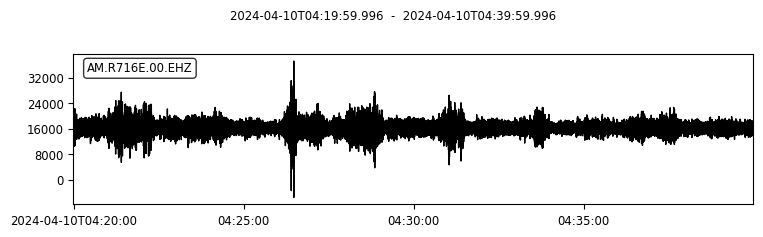

Signal-to-Noise Ratio (SNR) for 2024-04-11: 13.56


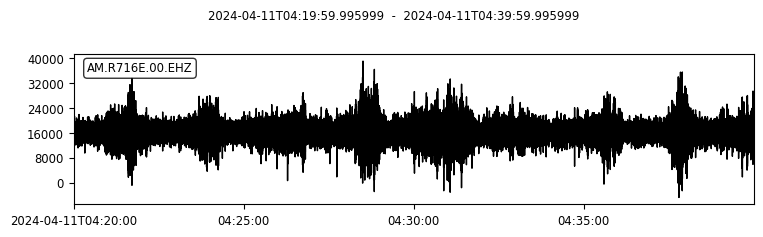

Signal-to-Noise Ratio (SNR) for 2024-04-13: 14.27


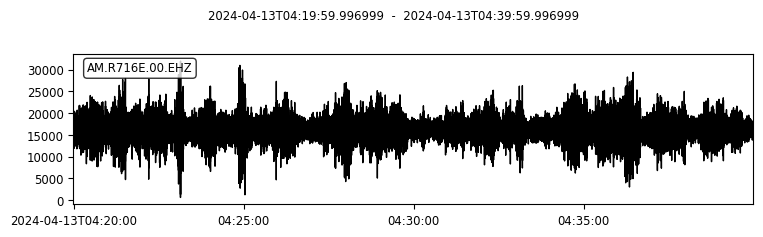

Signal-to-Noise Ratio (SNR) for 2024-04-14: 29.61


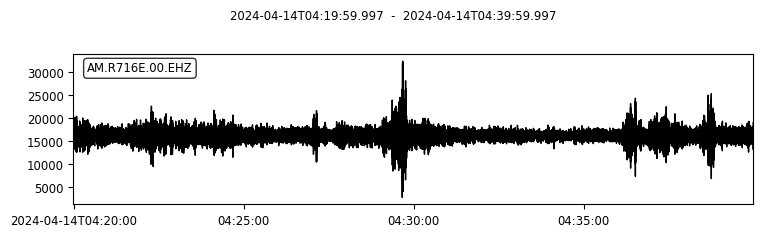

Signal-to-Noise Ratio (SNR) for 2024-04-15: 15.67


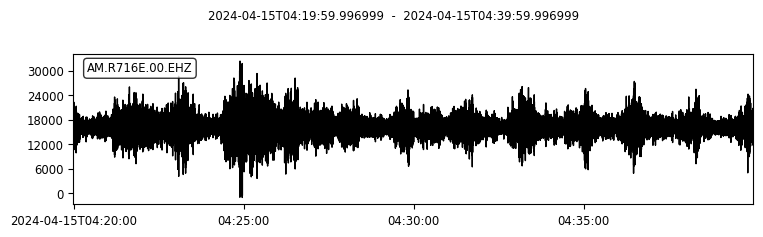

Signal-to-Noise Ratio (SNR) for 2024-04-16: 16.31


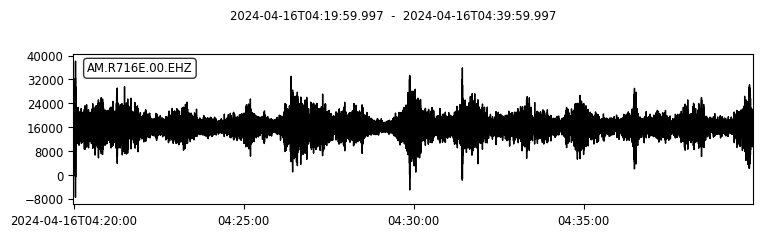

Signal-to-Noise Ratio (SNR) for 2024-04-17: 15.38


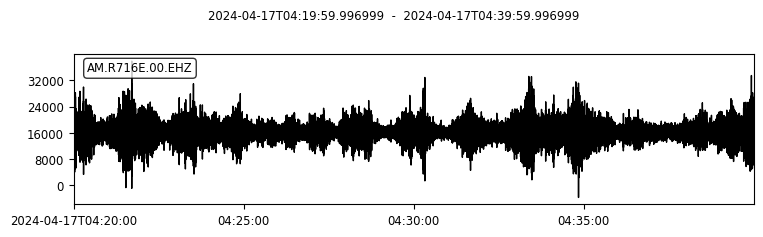

Signal-to-Noise Ratio (SNR) for 2024-04-18: 14.11


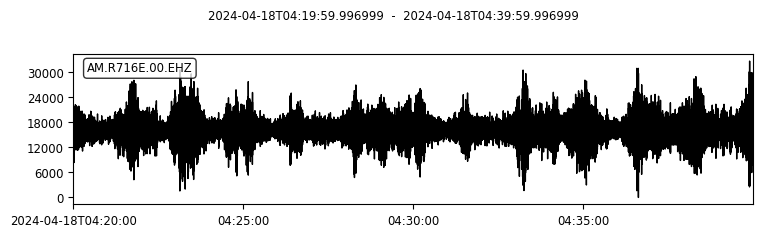

Signal-to-Noise Ratio (SNR) for 2024-04-19: 13.24


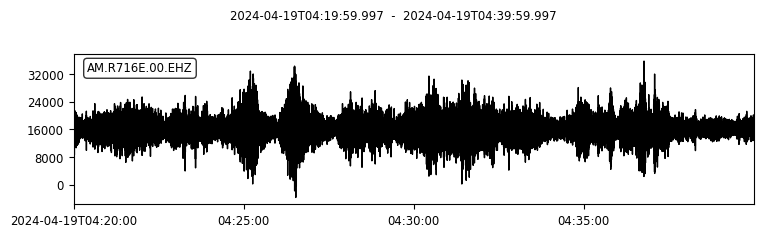

Signal-to-Noise Ratio (SNR) for 2024-04-20: 16.02


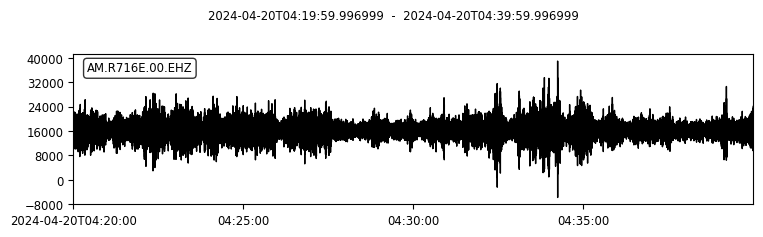

Signal-to-Noise Ratio (SNR) for 2024-04-21: 23.49


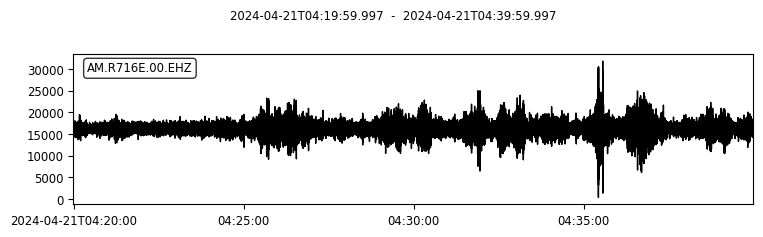

Signal-to-Noise Ratio (SNR) for 2024-04-22: 17.85


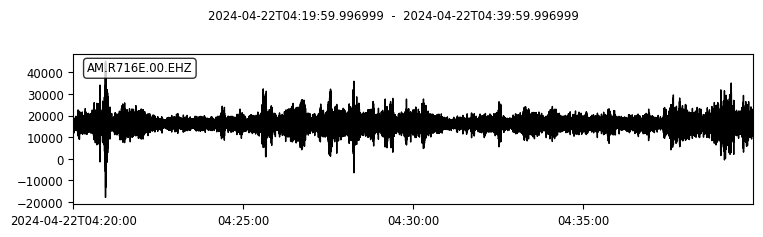

Signal-to-Noise Ratio (SNR) for 2024-04-23: 17.88


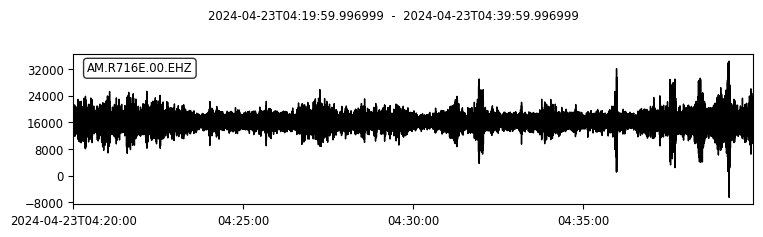

Signal-to-Noise Ratio (SNR) for 2024-04-24: 15.47


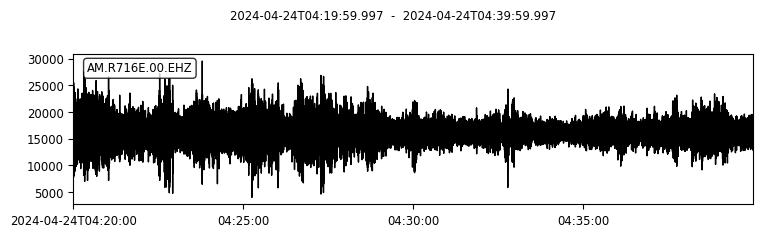

Signal-to-Noise Ratio (SNR) for 2024-04-25: 16.80


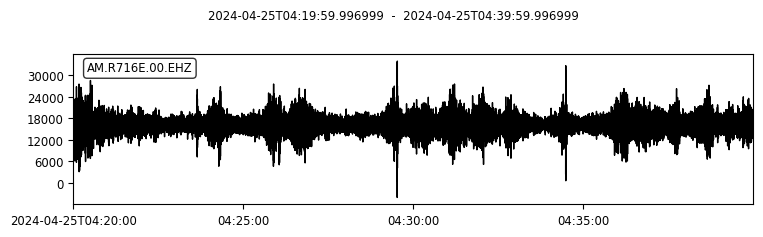

Signal-to-Noise Ratio (SNR) for 2024-04-26: 12.40


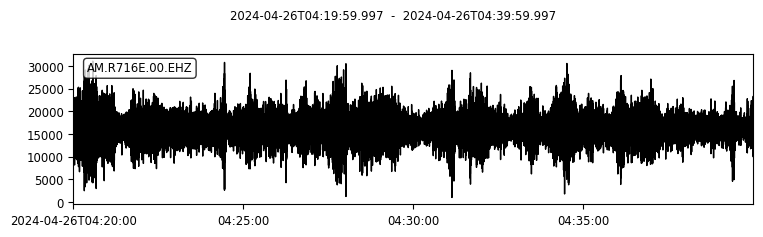

Signal-to-Noise Ratio (SNR) for 2024-04-27: 22.53


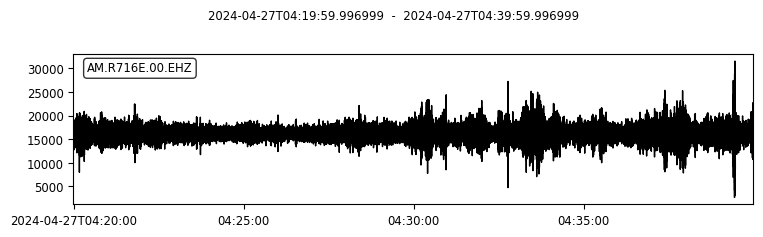

Signal-to-Noise Ratio (SNR) for 2024-04-28: 19.36


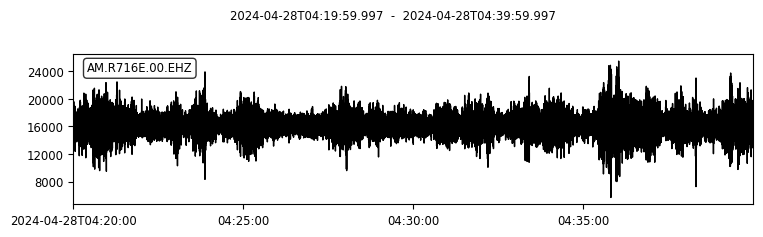

Signal-to-Noise Ratio (SNR) for 2024-04-29: 15.57


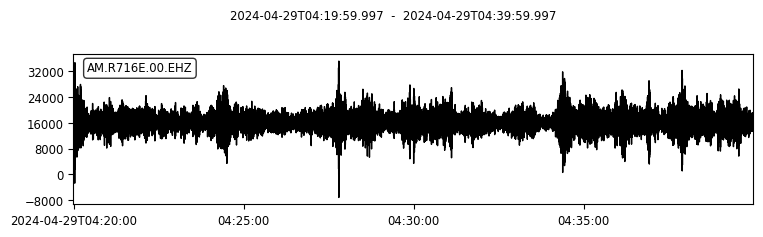

Signal-to-Noise Ratio (SNR) for 2024-04-30: 14.40


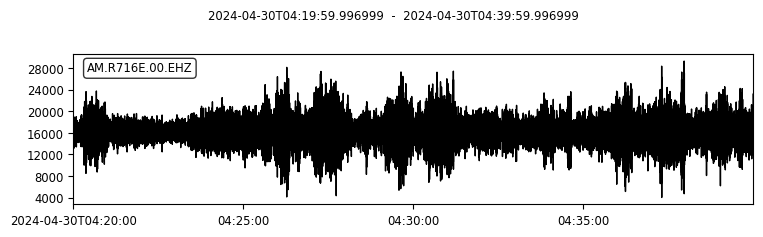

Signal-to-Noise Ratio (SNR) for 2024-05-01: 16.65


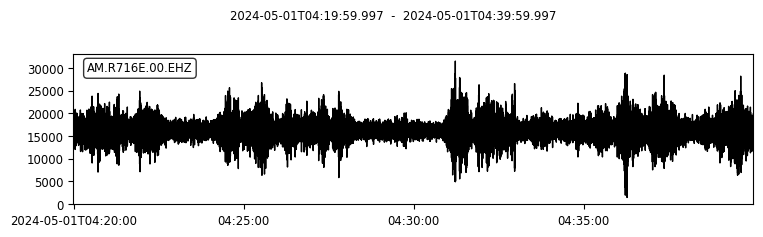

Signal-to-Noise Ratio (SNR) for 2024-05-04: 20.10


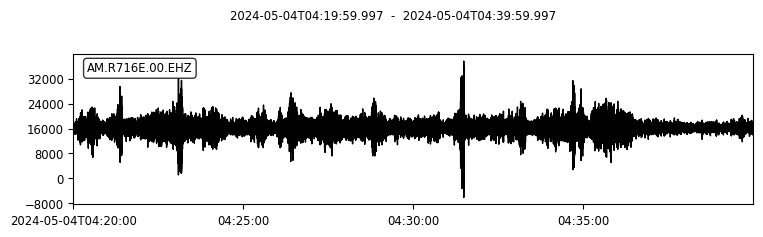

Signal-to-Noise Ratio (SNR) for 2024-05-05: 18.43


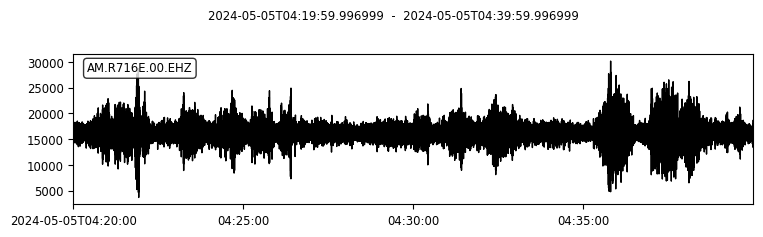

Signal-to-Noise Ratio (SNR) for 2024-05-06: 15.87


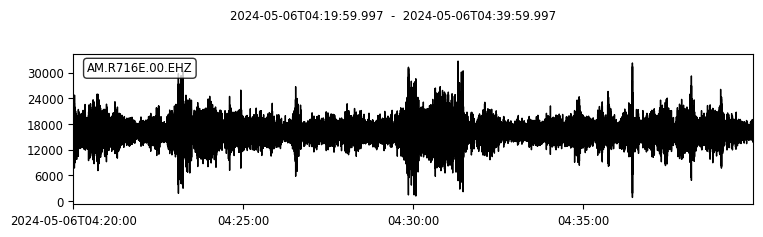

Signal-to-Noise Ratio (SNR) for 2024-05-07: 13.37


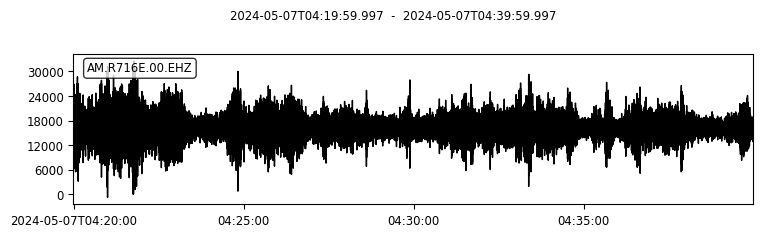

Signal-to-Noise Ratio (SNR) for 2024-05-08: 13.48


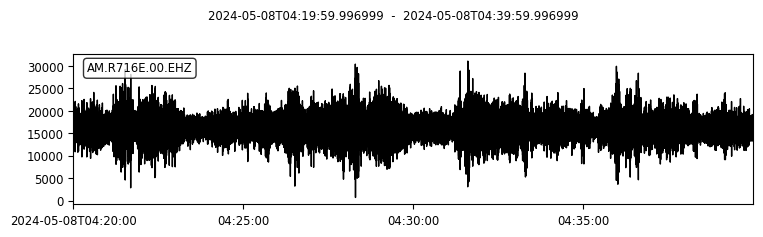

Signal-to-Noise Ratio (SNR) for 2024-05-09: 15.83


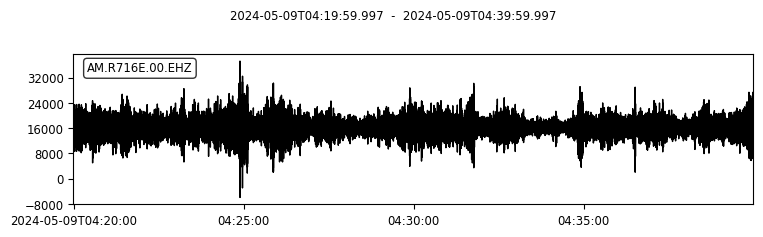

Signal-to-Noise Ratio (SNR) for 2024-05-10: 16.78


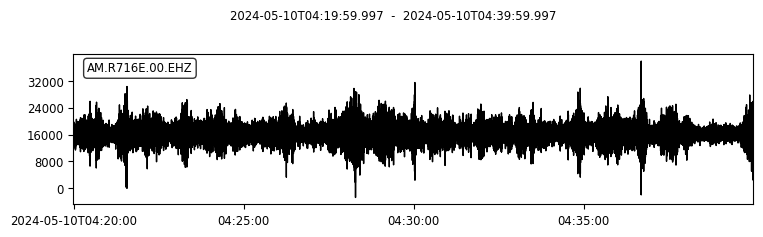

Signal-to-Noise Ratio (SNR) for 2024-05-11: 23.64


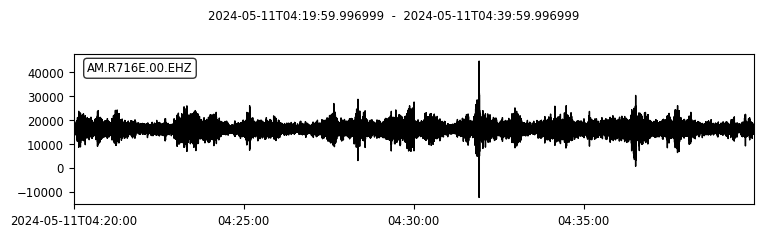

Signal-to-Noise Ratio (SNR) for 2024-05-12: 19.55


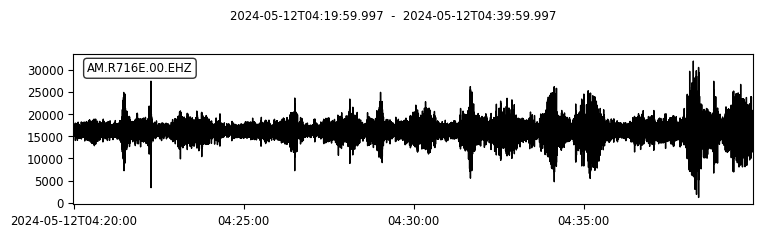

Signal-to-Noise Ratio (SNR) for 2024-05-13: 17.61


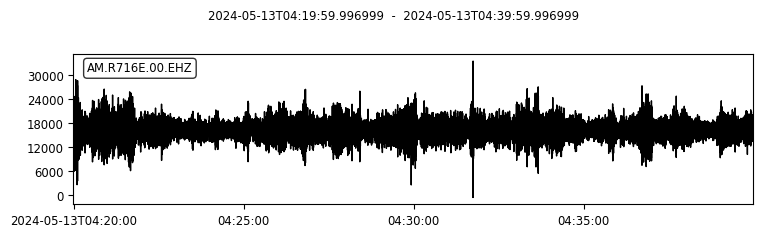

Signal-to-Noise Ratio (SNR) for 2024-05-14: 15.83


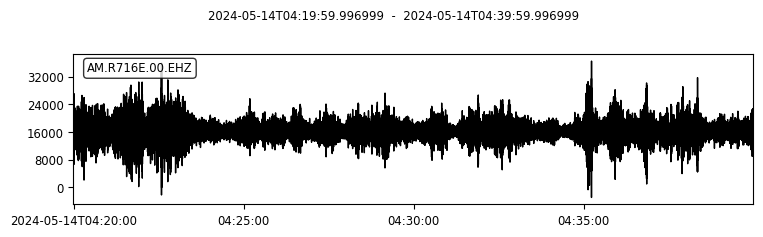

Signal-to-Noise Ratio (SNR) for 2024-05-15: 18.31


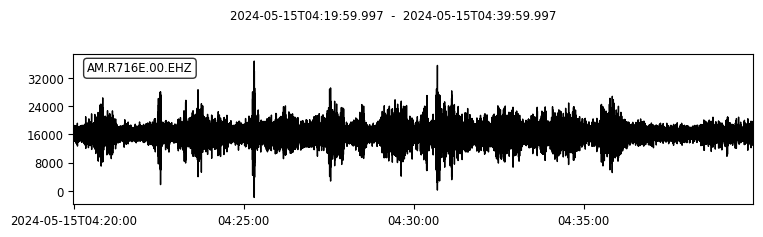

Number of SNRs greater than 20: 7


In [13]:
# Initialize a counter for SNRs greater than 20
count_high_snr = 0

# Process and plot data for each file path
for file_path in file_paths:
    # Extract the date from the file path
    date = extract_date_from_file_path(file_path)
    
    # Process the data for the given date
    stream = process_data(date, time, window_size, file_path)
    
    # Select the trace of interest
    tr = stream[0]

    # Get the data as a numpy array
    data = tr.data

    # Estimate signal-to-noise ratio (SNR)
    signal_level = np.max(data)
    noise_level = np.std(data)
    snr = signal_level / noise_level

    # Print the SNR
    print(f"Signal-to-Noise Ratio (SNR) for {date}: {snr:.2f}")
    
    # Check if the SNR is greater than 20
    if snr > 20:
        count_high_snr += 1
    
    # Plot the processed stream
    stream.plot()

# Print the count of SNRs greater than 20
print(f"Number of SNRs greater than 20: {count_high_snr}")

> :warning: **Missing Data**: Some data were excluded becuase of its poor quality upon collection in the sensor.

### Numerical Data Conversion

---

In [14]:
results_list = []

# Process and analyze data for each file path
for file_path in file_paths:
    # Extract the date from the file path
    date = extract_date_from_file_path(file_path)
    
    # Process the data for the given date
    stream = process_data(date, time, window_size, file_path)
    
    # Analyze the seismic data stream
    analysis_results = analyze_seismic_data(stream)
    
    # Append the analysis results to the results_list
    results_list.append(analysis_results)

# Create a pandas DataFrame from the results_list
df = pd.DataFrame(results_list)

In [15]:
# View the tabular data 
df

,Date,Data Quality,Standard Deviation,Peak-to-Peak Amplitude,Root Mean Square (RMS),Total PSD,Mean PSD,Signal-to-Noise Ratio (SNR),Median Absolute Deviation (MAD),Kurtosis,Skewness,Interquartile Range (IQR),Autocorrelation Peak,Wavelet Energy
0,2024-04-01,D,2454.7177,35366,16380.1884,1.537425e+07,119180.2158,13.5580,1444.0,1.8955,0.0155,2889.0,6,3.225206e+13
1,2024-04-02,D,2913.0334,43300,16455.2612,2.176845e+07,168747.7038,12.4046,1632.0,2.5621,-0.0133,3264.0,9,3.253164e+13
2,2024-04-03,D,2632.3041,44694,16406.4488,1.771743e+07,137344.4337,14.7643,1487.0,2.7349,0.0104,2974.0,5,3.236244e+13
3,2024-04-04,D,2242.6890,36496,16348.7703,1.293083e+07,100238.9651,15.3766,1348.0,1.8717,0.0278,2696.0,8,3.210649e+13
4,2024-04-05,D,2943.8699,44608,16461.1435,2.215907e+07,171775.7235,12.8759,1620.0,3.1061,0.0145,3240.0,7,3.256437e+13
5,2024-04-06,D,2434.6757,101838,16373.2212,1.494238e+07,115832.3946,22.4412,1352.0,18.4234,-0.1819,2703.0,9,3.223233e+13
6,2024-04-09,D,2303.7218,43755,16360.8657,1.356706e+07,105171.0169,16.7642,1177.0,5.2333,0.0110,2353.0,7,3.217101e+13
7,2024-04-10,D,1627.8114,42843,16281.3697,6.757976e+06,52387.4096,22.8780,874.0,5.2426,-0.0211,1747.0,7,3.186112e+13
8,2024-04-11,D,2885.8168,43894,16452.7554,2.111415e+07,163675.5686,13.5560,1599.0,3.0368,0.0209,3199.0,8,3.253310e+13
9,2024-04-13,D,2239.0320,31317,16342.8153,1.286425e+07,99722.8535,14.2736,1263.0,2.1234,-0.0008,2527.0,8,3.209080e+13


In [16]:
# Save the data
df.to_csv("csv_data/ehz_statistical_data.csv", index=False)